In [1]:
#para este ejemplo no nos hace falta tensorflow, con mumpy basta
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#creamos el entorno
env = gym.make('FrozenLake-v0')

In [3]:
#generamos la tabla QTable con tamaño [numero_observaciones, numero_de_acciones]
QTable = np.zeros([env.observation_space.n, env.action_space.n])

learning_rate = .9 
discount_factor = .95
num_episodes = 4000
reward_list = []

for i in range(num_episodes):
    s = env.reset()
    rAll = 0
    done = False
    j = 0
    
    while j < 99:
        j+=1
        #el simbolo : coge todos las acciones para un estado s
        #el random es coge una accion aleatoria en funcion del episodio, a mas episodios menos probababilidad
        a = np.argmax(QTable[s,:] + np.random.randn(1,env.action_space.n)* (1./(i+1)))
        #avanzamos el entorno
        s1,reward,done,_ = env.step(a)
        #formula del QLearning. Usamos la ecuacion de bellman para alcanzar la politica optima
        QTable[s,a] = QTable[s,a] + learning_rate * (reward + discount_factor * np.max(QTable[s1,:]) - QTable[s,a])
        rAll += reward
        s = s1
        if done == True:
            break
            
    reward_list.append(rAll)
        
        

In [4]:
print("Score over time: " + str(sum(reward_list) / num_episodes)) 

Score over time: 0.451


In [5]:
print("Final Q-Table Values")
print(QTable)

Final Q-Table Values
[[1.14131111e-01 6.80561543e-04 7.11694361e-04 7.94869416e-04]
 [1.74900506e-06 1.09895677e-05 7.14339704e-05 2.15260658e-01]
 [1.29178746e-01 3.10396161e-04 2.12694233e-04 5.82365559e-04]
 [3.69030465e-06 2.22039840e-05 6.14156473e-04 5.58069370e-04]
 [2.26841974e-01 2.07360097e-04 2.81922037e-05 1.39293513e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.29762358e-01 1.99511236e-04 8.18463528e-05 4.52435569e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.08844549e-04 5.01751129e-05 2.64215935e-05 1.16188334e-01]
 [1.30321347e-04 3.58886060e-01 4.13848569e-05 5.09932524e-05]
 [1.16474875e-01 7.75807682e-05 9.55408920e-06 2.51541756e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.39543527e-03 6.94660997e-04 9.25170216e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.12061020e-01]
 [0.00000000e+00 0.00000000e+00 0.

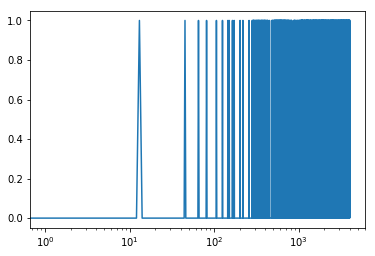

In [6]:
#mostramos el reward con el tiempo
plt.xscale("log")
plt.plot(reward_list)